# Working with APIs

## ChatGPT API in python
This notebook aims to provide a simple example of interacting with ChatGPT  using its python API

In [1]:
# Install Open AI API package
!pip install -q openai
import openai
import pandas as pd

from google.colab import userdata
openai.api_key = userdata.get('OpenAI_API_Key')  # Retrieve the service account info from the secret

In [25]:
client = openai.OpenAI(api_key=openai.api_key)

messages=[{"role": "user", "content": "Turn this movie title into emojis based on its script: Harry Potter and the Philosopher's Stone"}]

responses = client.chat.completions.create(
    model="gpt-5-nano",
    messages = messages
    )

response = responses.choices[0].message.content
print(response)

Here are a few emoji versions inspired by the story of the film:

- ⚡👦🏻👓🪄🦉✉️9️⃣3️⃣/4️⃣🏰💎
- ⚡👦🏻👓🪄🧙‍♂️🦉✉️9️⃣3️⃣/4️⃣🏰🗝️💎

Want a different vibe (shorter, more literal, or US title variant “Sorcerer’s Stone”)? I can tailor it.


### Bringing a list of highly rated movies from MovieLens
Data source: [MovieLens 25M dataset](https://grouplens.org/datasets/movielens/)

25 million ratings - 62,000 movies by 162,000 users - Released 12/2019

In [4]:
# Download movie 25M lens dataset
!wget https://files.grouplens.org/datasets/movielens/ml-25m.zip

--2025-09-19 20:34:30--  https://files.grouplens.org/datasets/movielens/ml-25m.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.96.204
Connecting to files.grouplens.org (files.grouplens.org)|128.101.96.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 261978986 (250M) [application/zip]
Saving to: ‘ml-25m.zip’

ml-25m.zip          100%[===================>] 249.84M  93.5MB/s    in 2.7s    

2025-09-19 20:34:33 (93.5 MB/s) - ‘ml-25m.zip’ saved [261978986/261978986]



In [5]:
# Unzip ml-25m.zip
!unzip ml-25m.zip

Archive:  ml-25m.zip
   creating: ml-25m/
  inflating: ml-25m/tags.csv         
  inflating: ml-25m/links.csv        
  inflating: ml-25m/README.txt       
  inflating: ml-25m/ratings.csv      
  inflating: ml-25m/genome-tags.csv  
  inflating: ml-25m/genome-scores.csv  
  inflating: ml-25m/movies.csv       


In [6]:
ls -lh ml-25m/

total 1.1G
-rw-rw-r-- 1 root root 416M Nov 21  2019 genome-scores.csv
-rw-rw-r-- 1 root root  18K Nov 21  2019 genome-tags.csv
-rw-rw-r-- 1 root root 1.4M Nov 21  2019 links.csv
-rw-rw-r-- 1 root root 2.9M Nov 21  2019 movies.csv
-rw-rw-r-- 1 root root 647M Nov 21  2019 ratings.csv
-rw-rw-r-- 1 root root  11K Nov 21  2019 README.txt
-rw-rw-r-- 1 root root  38M Nov 21  2019 tags.csv


In [7]:
movies = pd.read_csv('ml-25m/movies.csv', encoding='latin-1') # encoding='latin-1' was used
ratings = pd.read_csv('ml-25m/ratings.csv') # tab separated data

ratings = ratings.groupby('movieId').agg({'rating': 'mean', 'userId': 'count'})
ratings.columns = ['avg_rating', 'n_rating']
ratings = movies[['movieId', 'title']].merge(ratings[ratings.n_rating >= 10000].reset_index(), on='movieId').sort_values('avg_rating', ascending=False)
ratings = ratings.drop('movieId', axis=1).reset_index(drop=True)
ratings.head(10)

,title,avg_rating,n_rating
0,"Shawshank Redemption, The (1994)",4.413576,81482
1,"Godfather, The (1972)",4.324336,52498
2,"Usual Suspects, The (1995)",4.284353,55366
3,"Godfather: Part II, The (1974)",4.261759,34188
4,Seven Samurai (Shichinin no samurai) (1954),4.254769,13367
5,Schindler's List (1993),4.247579,60411
6,12 Angry Men (1957),4.243014,16569
7,Rear Window (1954),4.237948,20162
8,Fight Club (1999),4.228311,58773
9,One Flew Over the Cuckoo's Nest (1975),4.218662,36058


In [26]:
def GPTCompletion(messages):
    responses = client.chat.completions.create(
        model="gpt-5-nano",
        messages = messages
        )
    response = responses.choices[0].message.content

    return response

In [27]:
pd.set_option('display.max_colwidth', None)  # to show the full text in summary
enoji_df = pd.DataFrame()

for movie in ratings.title[:5]:
    messages=[{"role": "user", "content": f"Turn this movie title into only 10 emojis using the movie script and not just the title. No text, no line breaks, just emojis: {movie}"},
              {"role": "system", "content": "Only return emojis relevant to the request. Do not return any text."}]
    emoji_response = GPTCompletion(messages)

    messages=[{"role": "user", "content": "Provide a one line summary about this movie without spoilers: {}. Max 20 words".format(movie)}]
    summary_response = GPTCompletion(messages)

    enoji_df = pd.concat([enoji_df, pd.DataFrame({'movie': [movie], 'emoji': [emoji_response], 'summary': [summary_response]})], ignore_index=True)

enoji_df

,movie,emoji,summary
0,"Shawshank Redemption, The (1994)",🧱🕳️🔨🪜📚💡💵🚪🌧️🗝️,"Two imprisoned men endure years of hardship with hope and friendship, finding redemption."
1,"Godfather, The (1972)",👪👔🔫🐎💰💒🗡️🕵️🍝👑,An aging patriarch of a crime dynasty transfers control of his empire to his reluctant son.
2,"Usual Suspects, The (1995)",👤👤👤👤👤🕵️‍♂️🗝️😈🧠🔎,"A stylish, suspenseful crime thriller centered on five suspects and a legendary, elusive mastermind."
3,"Godfather: Part II, The (1974)",👨‍👦‍👦👔🗝️🔫💼💰🇮🇹🇨🇺👀🗺️,"A sweeping crime saga that follows the Corleone family across generations, blending personal drama with ruthless power."
4,Seven Samurai (Shichinin no samurai) (1954),7️⃣⚔️🗡️🛡️🏘️👨‍🌾💰🤝🏹🌧️,"A village hires seven samurai to defend against bandits, exploring courage, honor, and collective resilience."



## Fetching Latest News Headlines using News API

In this example, we'll use the [News API](https://newsapi.org/) to retrieve the latest news headlines. This API provides access to breaking news headlines, articles, and news sources.

To use this API, you'll need to sign up and get an API key from [News API](https://newsapi.org/register).

### Setup

Install the `requests` library:

In [28]:
!pip install -q requests

Below is a Python code example that fetches the latest news headlines from the News API and displays the title and description of each article:


In [29]:
import requests
import os

# Retrieve the API key from Colab Secrets
from google.colab import userdata

api_key = userdata.get('News_API')
url = 'https://newsapi.org/v2/top-headlines'

In [30]:
# Parameters for the API request
params = {
    'country': 'us',  # Specify the country you want news from
    'category': 'technology',  # You can choose categories like 'business', 'sports', 'technology', etc.
    'apiKey': api_key
}

In [31]:
# Make the API request
response = requests.get(url, params=params)

In [32]:
# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    articles = data['articles']

    # Print the title and description of the first 5 news articles
    for i, article in enumerate(articles[:5]):
        print(f"{i+1}. {article['title']}")
        print(f"{article['description']}")
else:
    print(f"Failed to fetch news: {response.status_code}")

1. Apple releases new iOS 26.0 build for iPhone 17 models - 9to5Mac
Apple has just released a new, revised iOS 26 build that’s exclusive to iPhone 17 models. Here’s what you should expect.
2. Mark Zuckerberg has begun his quest to kill the smartphone - TechCrunch
"The promise of glasses is to preserve this sense of presence that you have with other people," Mark Zuckerberg said.
3. Google Injects Gemini Into Chrome as AI Browsers Go Mainstream - WIRED
Google weaving Gemini further into the popular Chrome browser is an inflection point for AI in our software, although some users will still be looking for the “off” switch.
4. The first iPhone 17 Pro Max reviews are in: What the early testers are saying - Mashable
Sounds like Apple struck gold again.
5. Samsung preparing next major Android 16 update as One UI 8 goes wide on Galaxy S25 - 9to5Google
As Samsung rolls out One UI 8 to the Galaxy S25 lineup, it's also beginning internal testing on the software that will power the Galaxy S26.


This code fetches the top headlines from the US, specifically from the "technology" category, and prints the title and description of the first five articles.
You can adjust the country and category parameters to get news from different regions or topics.

## Yahoo Finance

In [34]:
import yfinance as yf

#define the ticker symbol
symbol = 'NVDA'

#get data on this ticker
tickerData = yf.Ticker(symbol)

#get the historical prices for this ticker
tickerDF = tickerData.history(interval='1d', start='2010-1-1')

#see your data
tickerDF

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-01-04 00:00:00-05:00,0.424289,0.426810,0.415120,0.423830,800204000,0.0,0.0
2010-01-05 00:00:00-05:00,0.422226,0.434604,0.422226,0.430019,728648000,0.0,0.0
2010-01-06 00:00:00-05:00,0.429790,0.433687,0.425664,0.432770,649168000,0.0,0.0
2010-01-07 00:00:00-05:00,0.430478,0.432311,0.421080,0.424289,547792000,0.0,0.0
2010-01-08 00:00:00-05:00,0.420850,0.428185,0.418329,0.425206,478168000,0.0,0.0
...,...,...,...,...,...,...,...
2025-09-15 00:00:00-04:00,175.669998,178.850006,174.509995,177.750000,147061600,0.0,0.0
2025-09-16 00:00:00-04:00,177.000000,177.500000,174.380005,174.880005,140737800,0.0,0.0
2025-09-17 00:00:00-04:00,172.639999,173.199997,168.410004,170.289993,211843800,0.0,0.0


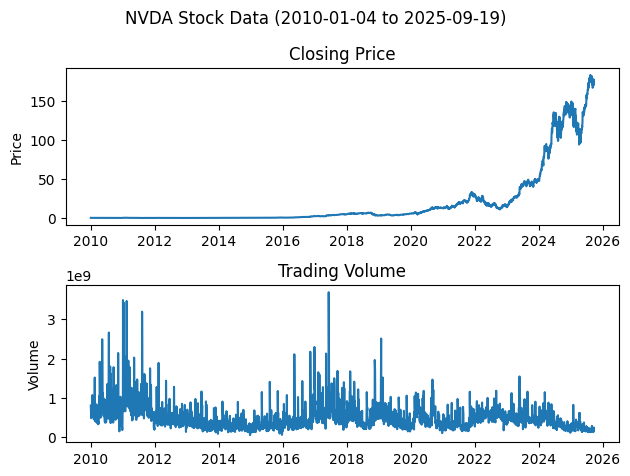

In [35]:
import matplotlib.pyplot as plt

# Create the first panel and set the current axis
plt.subplot(2, 1, 1)  # (rows, columns, panel number)
plt.plot(tickerDF['Close'])
plt.title('Closing Price')  # Add title for the first plot
plt.ylabel('Price')  # Add y-axis label

# Create the second panel and set the current axis
plt.subplot(2, 1, 2)
plt.plot(tickerDF['Volume'])
plt.title('Trading Volume')  # Add title for the second plot
plt.ylabel('Volume')  # Add y-axis label

# Add a main title to the chart
plt.suptitle(f'{symbol} Stock Data ({str(tickerDF.index.min().date())} to {str(tickerDF.index.max().date())})')  # This will add a title at the top of the figure

# Adjust layout to prevent overlap
plt.tight_layout(pad=1.0);